# Text Generation using Recurrent Neural Network

### Content
- [1. Mounting the google drive to google colab](#1.-Mounting-the-google-drive-to-google-colab)
- [2. Standard Imports for Recurrent Neural Networks](#2.-Standard-Imports-for-Recurrent-Neural-Networks)
- [3. Loading the txt file that is used for RNN](#3.-Loading-the-txt-file-that-is-used-for-RNN)
- [4. Exploring text dataset](#4.-Exploring-text-dataset)
- [5. Numerical encode the sentences and features](#5.-Numerical-encode-the-sentences-and-features)
- [6. train-test-split X and y](#6.-train-test-split-X-and-y)
- [7. Create RNN model](#7.-Create-RNN-model)
- [8. Plot RNN model](#8.-Plot-RNN-model)
- [9. Creating ModelCheckpoint and callback requirements](#9.-Creating-ModelCheckpoint-and-callback-requirements)
- [10.Training my RNN model](#10.Training-my-RNN-model)
- [11. evaluating performance of model](#11.-evaluating-performance-of-model)
  - [11.1 Training Accuracy & Loss](#11.1-Training-Accuracy-&-Loss)
  - [11.2 Testing Accuracy & Loss](#11.2-Testing-Accuracy-&-Loss)
  - [11.3 Plotting train and test together](#11.3-Plotting-train-and-test-together)
- [12.Try generating text using help from keras.io](#12.Try-generating-text-using-help-from-keras.io)
- [13. Try correct spelling of generating text using TextBlob](#13.-Try-correct-spelling-of-generating-text-using-TextBlob)
- [14. Evaluation with other model runs & Conclusion](#14.-Evalulation-with-other-model-runs-&-Conclusion)
- [15. Running my model on the entire dataset](#15.-Running-my-model-on-the-entire-dataset)
  - [15.1 using the chosen model topology](#15.1-using-the-chosen-model-topology)
  - [15.2 Checkpoint to save model](#15.2-Checkpoint-to-save-model)
  - [15.3 Helper functions from earlier references](#15.3-Helper-functions-from-earlier-references)
  - [15.4 Fit the entire dataset](#15.4-Fit-the-entire-dataset)
  - [15.5 Accuracy & loss of Entire Dataset](#15.5-Accuracy-&-loss-of-Entire-Dataset)
  - [15.6 Generating using the trained model](#15.6-Generating-using-the-trained-model)
  - [15.7 correcting using TextBlob](#15.7-correcting-using-TextBlob)
- [16. References](#16.-References)

### 1.  Mounting the google drive to google colab

In [1]:
# mounting the my googledrive to google.colab
# this is needed to save my weights, Neural Network model while it is running
# the model, weights can be accessed at a later time if google colab disconnects

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 2. Standard Imports for Recurrent Neural Networks

In [2]:
from __future__ import print_function

# For preprocessing the text into integer(ids)
# For plotting the accuracy and loss curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# regular expression to proprocess raw_text
import regex as re

# To instantiate Recurrent Neural Networks
from keras.models import Sequential
# My model will be dense with all the nodes to 'touch'
from keras.layers import Dense, Activation
from keras.layers import LSTM, GRU, Bidirectional, Dropout
# plot model architecture
from keras.utils import plot_model

# to create a callback, this will be a checkpoint
from keras.callbacks import LambdaCallback

# need to create a random seed to create a text, so the model will learn the sequence
import random
import sys
import io

### 3. Loading the txt file that is used for RNN

- rating 5.0 `reviews` for 'Python for Everybody' course from Coursera is converted to text format
- it is preprocessed to remove url links, emoji. 
- alphabets, spacing and necessary punctuations remains.

In [3]:
# cd to pull my txt file from my google drive into google colab
#%cd /content/gdrive/My Drive/Capstone/Data/

# filename called 'out.txt'
filename = "rnn_text.txt"

# extract the raw text
raw_text = open(filename, 'r', encoding='utf-8').read()


# lowercase my text
data = raw_text.lower()
# remove url links
data = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',data)
# keep punctuations this time
data = re.sub("[^a-zA-Z.,?!'\";:-]", " ", data)
# strip to remove empty spaces before beginning and end of string
data = data.strip()

### 4. Exploring text dataset

- there are a total of 36 characters which includes spacing, alphabets and necessary punctuations
- these unique characters are mapped to numerical values & vice-versa.
- the numerical values act as index to map the different characters into each matrix for feeding into the RNN model
- the output will be predicted matrix which will have 36 different matrix which will be mapped back to characters 

In [4]:
# set - find a list of specific characters 
# list - to convert characters into a list
# sorted - to sort list into alphabetical order
chars = sorted(list(set(data)))

# count of total characters
print('total chars: ', len(chars))

total chars:  36


In [5]:
# mapping the characters to numerical values & vice versa
# this will be crucial for feeding into our RNN model
# and required to map the predicted numerical values back to their corresponding characters

char_indices = dict((c, i) for i, c in enumerate(chars))

# noted that in this list of character mapping, there is no 'z' in text
# noted that ' ' white space is counted as a character
char_indices

{' ': 0,
 '!': 1,
 '"': 2,
 "'": 3,
 ',': 4,
 '-': 5,
 '.': 6,
 ':': 7,
 ';': 8,
 '?': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [6]:
# this will be used from mapping numerical values back to characters
indices_char = dict((i, c) for i, c in enumerate(chars))

indices_char

{0: ' ',
 1: '!',
 2: '"',
 3: "'",
 4: ',',
 5: '-',
 6: '.',
 7: ':',
 8: ';',
 9: '?',
 10: 'a',
 11: 'b',
 12: 'c',
 13: 'd',
 14: 'e',
 15: 'f',
 16: 'g',
 17: 'h',
 18: 'i',
 19: 'j',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'o',
 25: 'p',
 26: 'q',
 27: 'r',
 28: 's',
 29: 't',
 30: 'u',
 31: 'v',
 32: 'w',
 33: 'x',
 34: 'y',
 35: 'z'}

### 5. Numerical encode the sentences and features

- the numerical mapping will be encoded using np.zeros
- maxlen=100, means the text input into the RNN model will be 100 characters long

In [7]:
len(data)

1208987

In [8]:
text = data

- maxlen = 100, means sentences of 100 characters will be used in the neural network
- sentences are slices of the text with 100 characters with 3 steps
- next_chars are the target, which is each individual character at each 3 steps
- There are a total of 402963 sequences as:
  - ((total characters which is 1208987) - (the first sentence which is 100 character long))/ divided by steps of 3
  - this results in 402962.3333 sequences round up to 402963

In [9]:
maxlen = 100
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 402963


- Note that the below sentences are overlapping in 3 steps(3 characters at a time)
- characters in next_chars are the every 3 steps in at the end of the sentence

In [10]:
print(sentences[:5])
print(next_chars[:5])

['just auditing this course helped me a lot in learning this language programming. attentive save the ', 't auditing this course helped me a lot in learning this language programming. attentive save the mon', 'uditing this course helped me a lot in learning this language programming. attentive save the money ', 'ting this course helped me a lot in learning this language programming. attentive save the money i w', 'g this course helped me a lot in learning this language programming. attentive save the money i will']
['m', 'e', 'i', 'i', ' ']


In [11]:
len(text)

1208987

In [12]:
# creating the shape of X, filled with boolean False
# Hence the shape of X will be (402963, 100, 36)

X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
X[:5]

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [13]:
# creating the shape of y, filled with boolean False
# Hence the shape of X will be (402963, 36)
# note that 36 is what we are trying to predict as there are 36 unique characters

y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
y[:5]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
   

In [14]:
# map in 1, where 1 means True
# based on the enumerating though the 402963 sentences and 36 characters(which acts as an index), map the 1 in the correct position

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [ ]:
X

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False,  Tr

In [ ]:
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [ ]:
X.shape

(402963, 100, 36)

In [ ]:
X.shape[1]

100

In [ ]:
X.shape[2]

36

In [ ]:
y.shape

(402963, 36)

### 6. train-test-split X and y

X and y are split into train and test sets, **shuffle=False** is used as reviews are written in a sequence

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, shuffle=False)

In [16]:
print('X_train.shape :', X_train.shape )
print('y_train.shape :', y_train.shape )
print('X_test.shape :', X_test.shape )
print('y_test.shape :', y_test.shape )

X_train.shape : (302222, 100, 36)
y_train.shape : (302222, 36)
X_test.shape : (100741, 100, 36)
y_test.shape : (100741, 36)


### 7. Create RNN model

**Note**: this is actually the 9th model which is eventually picked as the best-tuned model based on evaluation in the bottom part of this Jupyter Notebook. The architecture of this 2-layer LSTM model is referenced from [The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). In this article, the model uses 2 LSTM layers with 0.5 dropout whereas the below model uses 2 LSTM layers with 0.2 dropout.

- model is instantiated with: 
  - Sequential(), 
  - add in a LSTM layer batches of 128, input shape=(100, 36) which is (X.shape[1], X.shape[2])
  - add a Dropout layer of 0.2
  - add in a LSTM layer also with 128 for the same batches to feed in
  - add a Dropout layer of 0.2
  - add a Dense layer with 36 characters which the RNN is trying to predict with activation 'softmax' as the is a multi-class classification/prediction
  
- model is compiled with:
  - loss = 'categorical_crossentropy' as it is multi-class classification
  - optimizer='adam' which is standard optimizer
  - metrics=['accuracy'] for classification

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          84480     
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 36)                4644      
Total params: 220,708
Trainable params: 220,708
Non-trainable params: 0
_________________________________________________________________


### 8. Plot RNN model

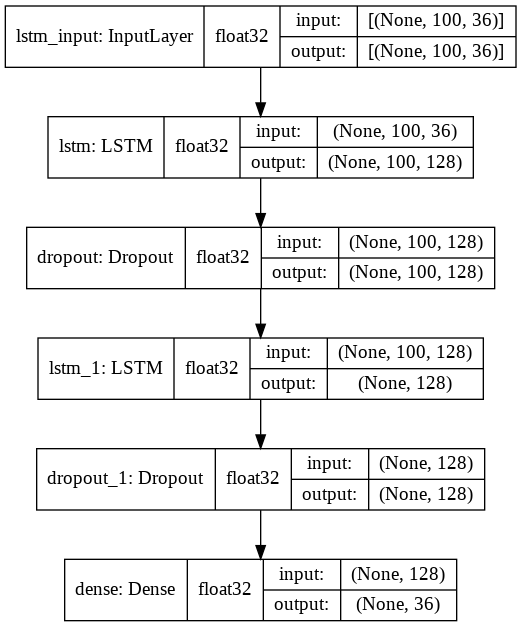

In [18]:
from keras.utils import plot_model

plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96
)

### 9. Using my ModelCheckpoint and callback requirements

Here are the references that checkpoint and callbacks are used from :
   - [Text Generation With RNN + TensorFlow from section.io](https://www.section.io/engineering-education/text-generation-nn/)
   - [Character-level text generation with LSTM from keras.io](https://keras.io/examples/generative/lstm_character_level_text_generation/)
   - [Tutorial from Tanner Gilbert](https://github.com/TannerGilbert/Tutorials/tree/master/Keras-Tutorials)

- checkpoint path to save weights and best model if disconnection occurs while fitting

In [19]:
from keras.callbacks import ModelCheckpoint

# specifying where my checkpoint files will be stored
filepath = "/content/gdrive/My Drive/Capstone/Data/"

# this ModelCheckpoint save weights and save the best model as it runs
checkpoint = ModelCheckpoint(filepath, monitor='loss',
                             save_weights_only=True, save_best_only=True,
                             mode='min',verbose=1 )

- ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.
    [source](https://keras.io/api/callbacks/reduce_lr_on_plateau/)

In [20]:
# this code is from Tanner Gilbert' Tutorial
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.001)

- adjust the temperature parameter to generate more or less random predictions when trying to generate text[source](https://www.tensorflow.org/tutorials/text/text_generation)
- when temperature =1, means the samples produced will be more diverse


In [21]:
# this code is from Character-level text generation with LSTM from keras.io
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

- the function generates text after each epoch, so we can monitor the progress of the model by the semantics of the text generated

In [22]:
# this code is from Tanner Gilbert' Tutorial
def on_epoch_end(epoch, logs):
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            # np.zeros((1, maxlen, len(chars))) is the shape of matrix for 1 character
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            
            # indices_char the earlier dictionary for mapping integer to character
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [23]:
### combining all of my callbacks

callbacks = [print_callback, checkpoint, reduce_lr]

### 10.Training my RNN model

- model is trained for 100 epoch

In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data =(X_test, y_test),callbacks=callbacks)

Epoch 1/100
2362/2362 [==============================] - 64s 20ms/step - loss: 2.4777 - accuracy: 0.3044 - val_loss: 1.4893 - val_accuracy: 0.5734

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "and many many thanks to our instructor dr. charles severance who made this course very engaging and "
and many many thanks to our instructor dr. charles severance who made this course very engaging and the course and the course and the course in the course a great course in the course and this course and the course and the course in a great course a great course in the course in the course and the programming and the course and the course in the course in the programming and the course in this course and a learn and the course and the course and the course and the course and i a for the course a
----- diversity: 0.5
----- Generating with seed: "and many many thanks to our instructor dr. charles severance who made this course very engaging and "
and many m

### 11. evaluating performance of model

#### 11.1 Training Accuracy & Loss

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [26]:
train_Loss, train_Accuracy = model.evaluate(X_train, y_train, verbose=2)

9445/9445 - 43s - loss: 0.7139 - accuracy: 0.7780


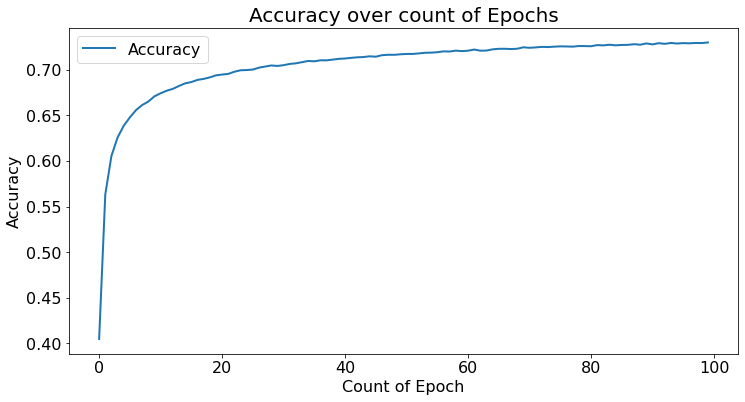

In [27]:
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
plt.plot(history.history['accuracy'], label='Accuracy', lw=2)
plt.xlabel('Count of Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over count of Epochs', fontsize=20)
plt.legend();

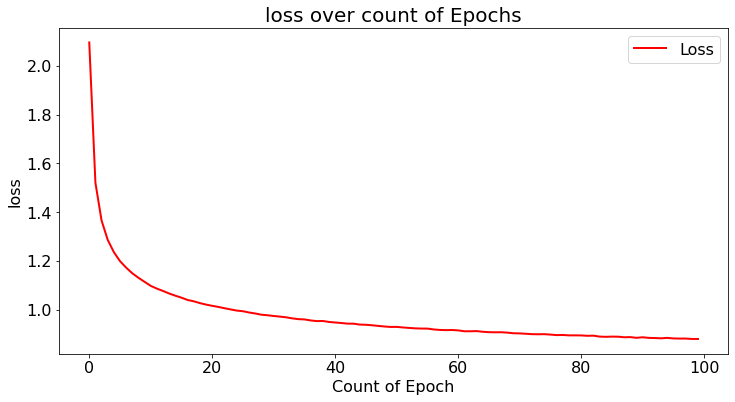

In [28]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Loss', lw=2, color='red')
plt.xlabel('Count of Epoch')
plt.ylabel('loss')
plt.title('loss over count of Epochs', fontsize=20);
plt.legend();

#### 11.2 Testing Accuracy & Loss

In [29]:
test_Loss, test_Accuracy = model.evaluate(X_test, y_test, verbose=2)

3149/3149 - 14s - loss: 0.9765 - accuracy: 0.7186


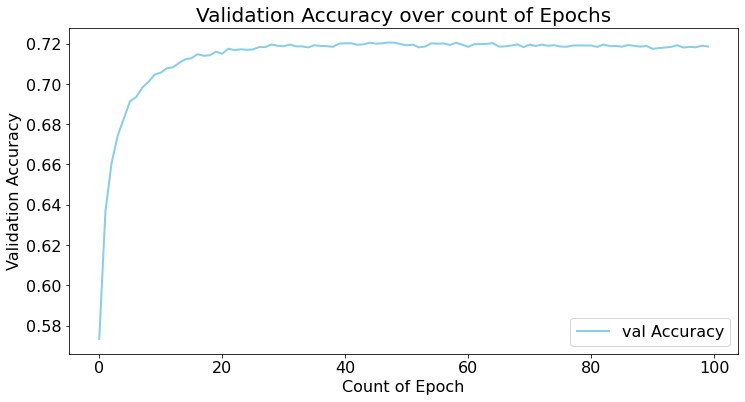

In [31]:
plt.figure(figsize=(12,6))
plt.plot(history.history['val_accuracy'], label='val Accuracy', lw=2, color='skyblue')
plt.xlabel('Count of Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over count of Epochs', fontsize=20)
plt.legend();

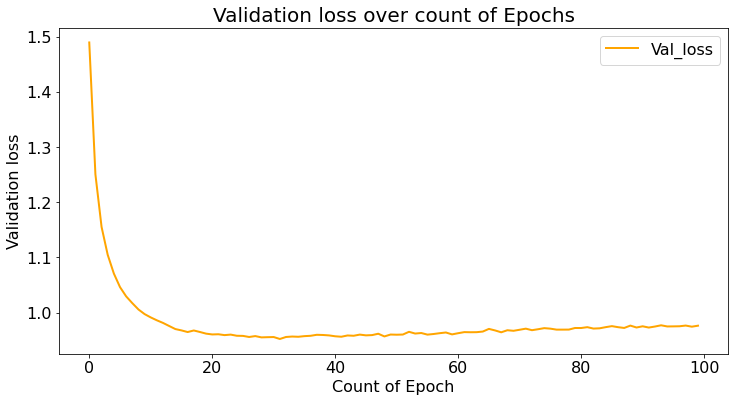

In [32]:
plt.figure(figsize=(12,6))
plt.plot(history.history['val_loss'], lw=2, label='Val_loss', color='orange')
plt.xlabel('Count of Epoch')
plt.ylabel('Validation loss')
plt.title('Validation loss over count of Epochs', fontsize=20)
plt.legend();

#### 11.3 Plotting train and test together

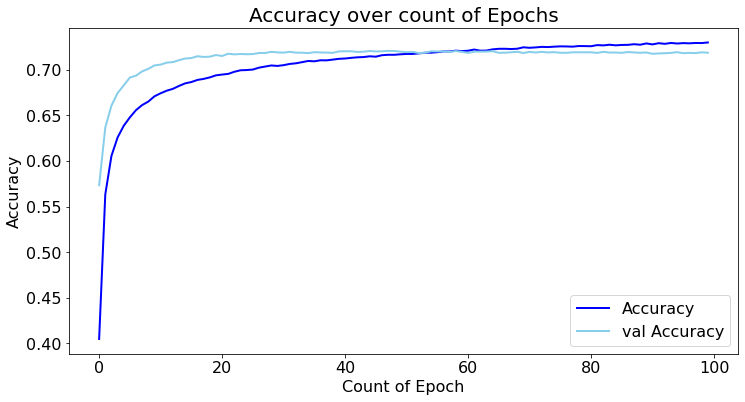

In [33]:
### Combine both plots

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
plt.plot(history.history['accuracy'], label='Accuracy', lw=2, color='blue')
plt.plot(history.history['val_accuracy'], label='val Accuracy', lw=2, color = 'skyblue')
plt.xlabel('Count of Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over count of Epochs', fontsize=20)
plt.legend();

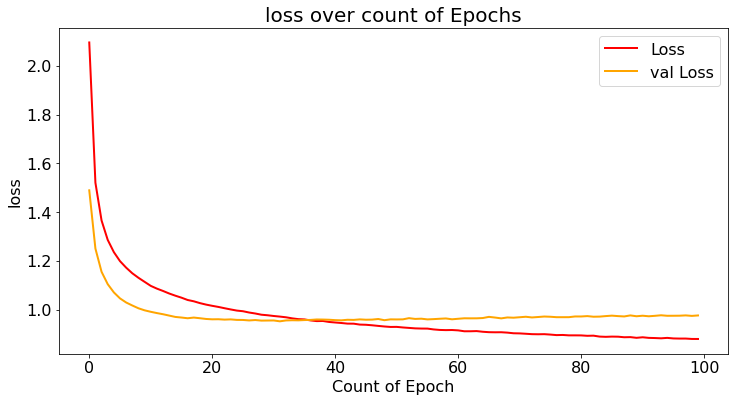

In [34]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],label='Loss', lw=2, color='red')
plt.plot(history.history['val_loss'], label='val Loss', lw=2, color='orange')
plt.xlabel('Count of Epoch')
plt.ylabel('loss')
plt.title('loss over count of Epochs', fontsize=20);
plt.legend()


### 12.Try generating text using help from keras.io

Here are the references that character text generation is used from :
   - [Tutorial from Tanner Gilbert](https://github.com/TannerGilbert/Tutorials/tree/master/Keras-Tutorials)

The below function uses the trained model to generate a matrix which different matrix refer to 1 of the 36 unique characters
- which the matrix will be mapped into a character as an output

- diversity in this case refers to temperature too:
  - lower the diversity/temperature, makes the model generate text that are more conservative
  - higher the diveristy/temperature, makess the model generate text that have more diversity but might be prone to mistakes

In [ ]:
# this code is from Tanner Gilbert' Tutorial

def generate_text(length, diversity):
    # this first few lines gets a random slice of the original text
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated = ''
    sentence = text[start_index: start_index + 100]  
    
    # this will be the starting point where each subsequent matrix will be predicted then mapped to a character
    generated += sentence
    for i in range(length):
        
            # np.zeros((1, maxlen, len(chars))) is the shape of matrix for 1 character
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
                
            
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            
            # indices_char the earlier dictionary for mapping integer to character
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated

In [ ]:
# breaking down the code to understand each step
# this step create a random slice (100 characters) of the original text 

start_index = random.randint(0, len(text) - maxlen - 1)
generated = ''
sentence = text[start_index: start_index + 100]
generated += sentence
generated

' this is the right course for you to start dipping your toes into the world of programming..... enjo'

In [ ]:
# this creates the shape of matrix for 1 character np.zeros((1, maxlen, len(chars)))
x_pred = np.zeros((1, maxlen, len(chars)))
x_pred

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
# loop through the list of sentence
# and as char_indices is a dictionary and [char] is the key, the corresponding integer is the value
# this value maps the position of 1 on the X_pred matrx
for i in range(2):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

In [ ]:
x_pred

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
# produce the predictions for x_pred
# where the activation is 'softmax' and probabilities for each output sum up to 1
# there are 36 values in the array as there are 36 unique characters
preds = model.predict(x_pred, verbose=0)[0]
display(preds)

# sample function helps to determine what integer it is most likely to be
next_index = sample(preds, 1)
display(next_index)

# indices_char is the dictionary which maps integer to the character
# [next_index] from the above code becomes a key and maps to a character
next_char = indices_char[next_index]
display(next_char)

array([1.8495730e-06, 2.4097578e-11, 9.2271347e-12, 1.9792359e-11,
       5.5755518e-08, 2.1893998e-06, 1.5718978e-08, 2.9462386e-13,
       9.8570534e-11, 4.2798335e-16, 1.9187093e-05, 1.3047072e-06,
       3.9590897e-05, 2.0092902e-04, 3.5595735e-10, 4.9913142e-06,
       6.4847164e-04, 4.2890265e-09, 1.7339888e-08, 7.8150691e-10,
       3.4263390e-05, 1.3614169e-06, 2.1127109e-07, 1.6500754e-04,
       1.3960525e-04, 8.8378238e-06, 1.2351075e-09, 7.4690356e-06,
       1.5116013e-08, 2.1948381e-07, 2.5943653e-03, 2.2952395e-06,
       3.7693360e-05, 1.7171597e-09, 9.9608999e-01, 7.9151778e-09],
      dtype=float32)

34

'y'

In [ ]:
# hence character 'y' is added
generated += next_char

# more characters will be added in the loop of the function 
generated

' this is the right course for you to start dipping your toes into the world of programming..... enjoy'

In [ ]:
# hence character 'y' is added
sentence = sentence[1:] + next_char

In [ ]:
sentence

'this is the right course for you to start dipping your toes into the world of programming..... enjoy'

#### Try generating text of different lengths and diversity

In [ ]:
print(generate_text(100, 1))

ished the whole thing in less than a week and even did some additional exercises. i can't wait to start python before" this course concept internalicelfes to take other also gradually more and i am ev


In [ ]:
print(generate_text(200, 1))

 make things so easier to learn and to understan in a global manner. thank you so much!" " this is an excellent experience : days. i knew notes that i took me in this to mayhners classes and how like nead of the course and also put that   i finally complete this people who wants to learn. this cours


In [ ]:
print(generate_text(300, 1))

ally must be for everyone. i highly recommend this class!" "i have never learned python before this course a little valueable but  the instructor and much bet medication with programming which which is really hard sot of this is your difficulty to learn., really informative and i knew that specialization is very well as a bradem this course and discussed this course cilles weekly taken at the disc


In [ ]:
print(generate_text(500, 0.2))

 realise it is so cool doing programming when  i was in university! should have met this course early what is a beginner than this course is a great course to learn python and the bonus videos are very interesting and explains everything about python in this course and i would say this course is a great teacher. i am so easy to understand and the teaching style and i would recommend this course to anyone who wants to learn python and i can the programming language. i will continue with the course in python and programming but never coursera in this course and i would do not have any coding and


In [ ]:
print(generate_text(500, 0.5))

general. the professor is very engaging and quite easy to follow, he has an amazing way of explaining it very helpful for the first online course and concepts in the second course in a way that it is a very good course for beginners like me with python. the course is very good and interesting. it was a great experience with python for me to complete the course. i would like to learn python and programming and a computer science programming language. as some of the course and a great teacher. i am really have a lot of experienced in programming such a very good course for beginners. the course 


In [ ]:
print(generate_text(500, 1))

urse to come." "very good start for programming with python. the instructor was very friendly and enjoyable! i am concise a coding in detail programmed to learn the basics of the teaching python actually. this is a good course for all a logical knowledge.and and better make it vasion. ""  the course is friendly work programming basic as been not only if sonswell of the world of python " programming. but the instructor was a great course and its a fun to oof or fresh duelite manner.  really explained me meen by the nasics. this instructor was takes before bit students in a wroind like more chap


In [ ]:
print(generate_text(1000, 0.2))

his case university of michigan! thanks for all work for making this course available online." "it is a great course for beginners with python and programming and i was able to learn a lot of the python programming language. i will say that the course is a great teacher and i would like to start to the next courses and programming experience in programming and i was able to take this course and i was able to do the course and the course is a great lecturer thank you so much for this course and i would recommend this course to anyone who wants to learn python and i was able to complete the course and the professor is amazing. i am a beginner in programming and explains the basics of python and i would recommend this course to anyone who wants to learn python and i was able to complete this course and i was able to take this course and i will continue to learn python and the assignments are a great teacher. the course is a great teacher and i was able to complete the course and the instr

In [ ]:
print(generate_text(1000, 0.5))

 pcm still i am learning python because i am highly interested in learning new thing about computer science in the course. thank you very much that is a great course for a spending and so impersone and concepts in a way that programming is a very entertaining and the instructor is great." "i have ever makes this course and i have a deeper of this course so much make the rest of the course. i think this course is a programming language in this course. if you have no prior knowledge of python to learn python. the way he teaches is really a little bit of programming before because i have a bit of experience working a programming experience and it was definitely and the book and for the very basic programming in the book is for all since the courses on python. so i am very excellent to the messor who has an amazing course is just programming language professor and designed in the specialization. " "this course is very little bit of computer science and completely what is the next courses. 

In [ ]:
print(generate_text(1000, 1))

 bored. its a very nice course. it starts from very basic programming concepts and introduces one to hove in this course. this course is really enjoying the instructor new as everything is difficult i may to program. " thank you course and the forums, the structure can learn helpful. i will want to start, but it helped me to enroll this course and i highly recommend the course to anybody! ., really be explains very aulieve that although that professor is very clear manner less on the world. having more examples with examples easier to change for python  and mr. charles severance! thanks to the way the lecturer knowledge and as light necessary of python. i can't wain that coursera and dr chuck makes me in my careing about it or and i started this course. i recommend this to take like my basic brace of coursera dr. chuck is excellent, beginner dr chuck 'dr. charles severance, more to the best. " "the course is a dreas for my way that python wants for beginners and simple en amazing exper

In [ ]:
print(generate_text(2000, 1))

s absolutely fantastic.  i highly recommend it for the person who wants to pursue this field, the pei-glad for beginner of a syntax. sotnation is for understand and openerming basic for everyone who wants to learn to from a code. so confidence who stress to grasp the first of exercisesion. looking forward to day ""practice and explained me in solving experience! "dr.chuck is amazing. you don't have any journey but this is the most of explaining this course covering your face in introduce he converiations to dr. charles. i will take this first lectures, i high had week you how to the course and nice course!" very thanks if you all really best content for beginners. thank you! " from this course.  thanks coursera for the introduction to python  and those step by step in confidence was very no knowledge that anyone who are not know and doing the students and specific engaging and i am glad a little going if a oplement to the smatements at taicktur. you can do not so concany that cranges n

### 13. Try correct spelling of generating text using TextBlob

- On top of the text generated by RNN model, the spelling of the text is further corrected by TextBlob

In [ ]:
generated1 = generate_text(1000, 1)

In [ ]:
from textblob import TextBlob

In [ ]:
generated1

"end the course for anyone who hasn't got any experience in programming yet. thank you dr. severance for the explanation i wanted to learn python background, and like lectures and subjomed and engaging and engaging it was a beginner that is accurate and taking his courses with the code so it helped me to say i inspire the topics. the instructor is very clear and quiz and assignment is by dart review and in the specialization course is increasially.  planning. i'm a bit of the teaching stuce.i engaged with it and hope that said and all owerted and patient with this course, like me and partically with best introductory course and all the material problems in python. this is a great course for started while libe attended through and have alone to write my coding.  the quizzes and assignments i have zero experienced roge spenise that i difficult studyes  and absolutely nardaily more, as that i can learn it flears about programming.  i only learned a little about them which i had a very ent

In [ ]:
generated1[100:]

"for the explanation i wanted to learn python background, and like lectures and subjomed and engaging and engaging it was a beginner that is accurate and taking his courses with the code so it helped me to say i inspire the topics. the instructor is very clear and quiz and assignment is by dart review and in the specialization course is increasially.  planning. i'm a bit of the teaching stuce.i engaged with it and hope that said and all owerted and patient with this course, like me and partically with best introductory course and all the material problems in python. this is a great course for started while libe attended through and have alone to write my coding.  the quizzes and assignments i have zero experienced roge spenise that i difficult studyes  and absolutely nardaily more, as that i can learn it flears about programming.  i only learned a little about them which i had a very entertaining a programming language and wantd to developing. i am sure that the book is extremely enjoy

In [ ]:
b = TextBlob(generated1)
b.correct()[100:]

TextBlob("for the explanation i wanted to learn patron background, and like lectures and sublimed and engaging and engaging it was a beginner that is accurate and taking his courses with the code so it helped me to say i inspire the topics. the instructor is very clear and quit and assignment is by dart review and in the specialization course is increasingly.  planning. i'm a bit of the teaching stuck.i engaged with it and hope that said and all lowered and patient with this course, like me and partially with best introductory course and all the material problems in patron. this is a great course for started while like attended through and have alone to write my coming.  the quires and assignment i have zero experienced rose sense that i difficult studies  and absolutely nardaily more, as that i can learn it fears about programming.  i only learned a little about them which i had a very entertaining a programming language and want to developing. i am sure that the book is extremely enj

In [ ]:
generated2 = generate_text(2000, 1)
generated2[100:]

'le and challenging. i know that comparing the course more idea away from the quizzes and assignments. if you are not going to for the material of the sext videos without the first programming language. i think this course has aid one of the best part bothes  and wants to start learning python and professor chuck, but i am a taking the next course with programming. i smould like and the instructor par termitions concepts i am so clear under to do it a lot and doing this flefor surmessed the instructor useful to start for those courses what\'s the subject, and i am so graded online online course. i liked it. i have tried my way to more confidence to improve scripts in a programming coding in this to anywher in the python   weeks  python from the videos-more confidence, but and its a good, very didicient and you can complete the instructor that are good like anyther specialization." "this is to keep fiors resources from my codile of more courses for those who are so fun. this caush a was

In [ ]:
b2 = TextBlob(generated2)
b2.correct()[100:]

TextBlob("e and challenging. i know that comparing the course more idea away from the quires and assignment. if you are not going to for the material of the set video without the first programming language. i think this course has aid one of the best part bother  and wants to start learning patron and professor chuck, but i am a taking the next course with programming. i should like and the instructor par terminations concepts i am so clear under to do it a lot and doing this flexor surpassed the instructor useful to start for those courses what's the subject, and i am so grade online online course. i liked it. i have tried my way to more confidence to improve script in a programming coming in this to anywhere in the patron   weeks  patron from the video-more confidence, but and its a good, very deficient and you can complete the instructor that are good like another specialization." "this is to keep firs resources from my couple of more courses for those who are so fun. this cause a w

In [ ]:
generated3 = generate_text(200, 1)
generated3[100:]

'derstand that he is a basic pace of the course who dr. charles severance has a lot of quiz and concepts. well as smort expining programs with python from paopred through quituly make my python free of'

In [ ]:
b3 = TextBlob(generated3)
b3.correct()[100:]

TextBlob("derstand that he is a basic pace of the course who dr. charles severance has a lot of quit and concepts. well as short expiring programs with patron from poured through quickly make my patron free of")

In [ ]:
generated4 = generate_text(300, 1)
generated4[100:]

"ching in the specialization. i'm solad easier tor indiden it ado las easily because i have lecture for a great introduction course to learn, this is the first online course and also my first course and you will be easy with his material. for me was easy to understand who would covely learn this cour"

In [ ]:
b4 = TextBlob(generated4)
b4.correct()[100:]

TextBlob("hing in the specialization. i'm sold easier to indian it ado las easily because i have lecture for a great introduction course to learn, this is the first online course and also my first course and you will be easy with his material. for me was easy to understand who would lovely learn this your")

### 14. Evaluation with other model runs & Conclusion

| model |           RNN type          |   Number of Characters   | epoch | train Loss | train Accuracy  | test Loss | test Accuracy | accuracy delta |             personal judgment             |
|:-----:|:---------------------------:|:------------------------:|:-----:|:----------:|:---------------:|:---------:|:-------------:|:--------------:|:-----------------------------------------:|
|   1   |            LSTM             |       27(alphabets)      |   10  |   2.4733   |      0.2929     |   2.5557  |     0.2691    |     0.0238     |               unintelligible              |
|   2   |            LSTM             |       27(alphabets)      |   50  |   0.7912   |      0.7586     |   1.0349  |     0.7039    |     0.0547     |        paragraphs with empty spaces       |
|   3   |            LSTM             |       27(alphabets)      |  100  |    0.754   |      0.7676     |   1.0838  |     0.6976    |      0.07      |           more variation in text          |
|   4   |            LSTM             | 36 (include punctuation) |  100  |   0.7858   |      0.7595     |   1.1328  |     0.6908    |     0.0687     |   spelling errors and able to understand  |
|   5   |             GRU             | 36 (include punctuation) |  100  |    0.826   |      0.7478     |   1.0881  |     0.6939    |     0.0539     |   spelling errors and able to understand  |
|   6   |            LSTM             | 36 (include punctuation) |   29  |   0.8817   |      0.7353     |   1.049   |     0.6981    |     0.0372     | early stopping - no meaning in paragraphs |
|   7   |             GRU             | 36 (include punctuation) |   24  |   0.8994   |      0.7283     |   1.0429  |     0.6994    |     0.0289     | early stopping - no meaning in paragraphs |
|   8   |           bi-LSTM           | 36 (include punctuation) |   27  |   0.8011   |      0.7574     |   1.093   |     0.6895    |     0.0679     | early stopping - no meaning in paragraphs |
|   9   | **2nd LSTM layer with dropout** | 36 (include punctuation) |  100  |   0.7139   |      0.778      |   0.9765  |     0.7186    |     0.0594     | **spelling errors and easiest to understand** |

From other model runs, **model 9** which is used in this notebook and **chosen as the model better-tuned to generate text.**

- `RNN type`: Researched that there are 2 popular recurrent cells: Long Short-Term Memory cell (LSTM) and the Gated Recurrent Unit cell (GRU). In addition, Bidirectional LSTM was used.LSTM (model 4) seems to perform better given other parameters are kept constant (model 5). When additional LSTM layer was used, **model 9** produced the best result

- `Number of Characters`: Initially modelling only used 27 unique characters which are alphabets, but the generated text did not appear realistic as punctuation is used to convey and clarify the meaning of written language. In addition, it gives structure to the sentence, hence necessary punctuations are included. the final 36 characters are used.

- `epoch`: An epoch is an iteration over the entire x and y data provided. From the observation, more epoch allow more iteration over the train and test set, hence there were better `accuracy` and lower `loss` score in general as epoch increases. `epoch` were not increased beyond 100 as based on the `accuracy` and `loss` plot, they started to plateau after 60 `epoch`

- `train accuracy`, `test accuracy`, `delta`: the accuracy score of the train and test set are very close, given that the`delta` value is very low. this is similar to the the loss scores too. **model 9** shows the highest train and test accuracy.

- *`early stopping`*: they are implemented on model 6 (LSTM), model 7(GRU) and model 8(Bidirectional-LSTM) and hence have low epoch, however the text generated is less understood than text from models with 100 epoch

- `personal judgement`: even though many of the models' accuracy score plateau to 0.76, how effective the RNN model is judged by how readible the text it generates, from the different models too. In this scenario, even though **model 9** shows overfitting at 100 epoch, the text generated is the most understood.

**In conclusion**: Even though model 9 shows overfitting, it has the highest accuracy and lowest loss with the most understood text. By adding 1 extra layer of LSTM with dropout layers, the text became more readable & realistic. For future improvements, the LSTM model can be made more complex with more layers or include embedding too.



In conclusion, RNN models like LSTM and GRU can help to generate artifical reviews for MOOCs like coursera or e-commerce that has an online presence.RNN model can be fine-tuned further to produce more realistic text, hence increasing it credibility  [source](https://www.theverge.com/2017/8/31/16232180/ai-fake-reviews-yelp-amazon)

### 15. Running my model on the entire dataset

#### 15.1 using the chosen model topology

In [ ]:
model_final = Sequential()
model_final.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_final.add(Dropout(0.2))
model_final.add(LSTM(128))
model_final.add(Dropout(0.2))
model_final.add(Dense(len(chars), activation='softmax'))

model_final.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model_final.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          84480     
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 36)                4644      
Total params: 220,708
Trainable params: 220,708
Non-trainable params: 0
_________________________________________________________________


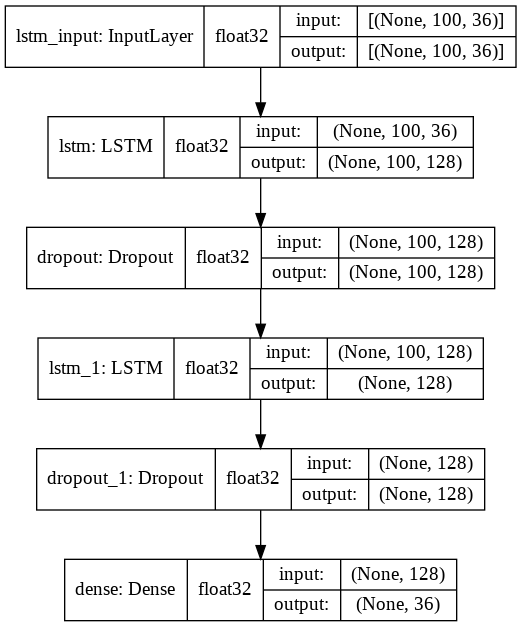

In [ ]:
plot_model(
    model_final, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96
)

#### 15.2 Checkpoint to save model

In [ ]:
from keras.callbacks import ModelCheckpoint

# specifying where my checkpoint files will be stored
filepath = "/content/gdrive/My Drive/Capstone/Data/"

# this ModelCheckpoint save weights and save the best model as it runs
checkpoint = ModelCheckpoint(filepath, monitor='loss',
                             save_weights_only=True, save_best_only=True,
                             mode='min',verbose=1 )

#### 15.3 Helper functions from earlier references

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.001)

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model_final.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
### combining all of my callbacks

callbacks = [print_callback, checkpoint, reduce_lr]

#### 15.4 Fit the entire dataset 

In [ ]:
history_final = model_final.fit(X, y, batch_size=128, epochs=100,callbacks=callbacks)

Epoch 1/100
3149/3149 [==============================] - 75s 18ms/step - loss: 2.3385 - accuracy: 0.3419

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "vious assignments however with a bit of persistence by reviewing previous weeks lectures and assignm"
vious assignments however with a bit of persistence by reviewing previous weeks lectures and assignments and the course is a very good and the course is a great explained the course is a great course is a some and the course and the course is a great and the course is a great course and a with a learn that is a great way the course is a great and the course and the course is a great introductor is a great course is a great and the course is a great course is a great and the course is a great cou
----- diversity: 0.5
----- Generating with seed: "vious assignments however with a bit of persistence by reviewing previous weeks lectures and assignm"
vious assignments however with a bit of persistence 

#### 15.5 Accuracy & loss of Entire Dataset

In [ ]:
print(history_final.history.keys())

dict_keys(['loss', 'accuracy', 'lr'])


In [ ]:
Loss, Accuracy = model_final.evaluate(X, y, verbose=2)

12593/12593 - 70s - loss: 0.7354 - accuracy: 0.7715


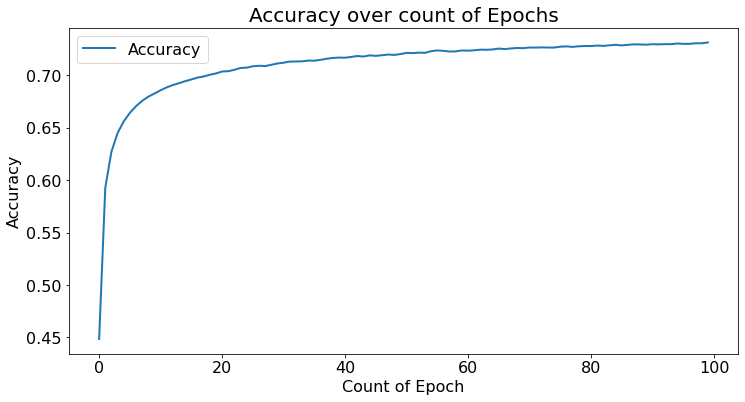

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
plt.plot(history_final.history['accuracy'], label='Accuracy', lw=2)
plt.xlabel('Count of Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over count of Epochs', fontsize=20)
plt.legend();

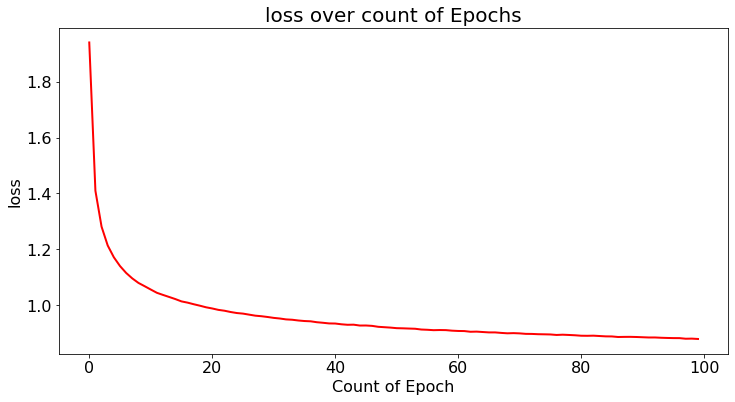

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history_final.history['loss'], lw=2, color='red')
plt.xlabel('Count of Epoch')
plt.ylabel('loss')
plt.title('loss over count of Epochs', fontsize=20);


#### 15.6 Generating using the trained model

In [ ]:
def generate_text(length, diversity):
    # Get random starting text
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated = ''
    sentence = text[start_index: start_index + 100]  #maxlen
    generated += sentence
    for i in range(length):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model_final.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated

In [ ]:
generate_text(100, 1)[100:]

'am no prior knowledge of python programming down with real really interesting course i got the cours'

In [ ]:
generate_text(200, 1)[100:]

'o have no background on understanding python programming but before, no videos, videos are that you much even it knows how to certiting this course only, very good assignment.he can also a complete le'

In [ ]:
generate_text(300, 1)[100:]

'llang to learn through this course. passion to selp. also, this was a too the teaching method. whated by the course lectures   i thought this is a really great introduction to python, ""also will help you fill woth the lecture needs to really learn more projects. it was well informative with no pyth'

In [ ]:
generate_text(500, 0.2)[100:]

' who have no prior knowledge of python and programming and programming in python. i would like to thank to dr. chuck for this course is very helpful for me to learn python and programming and programming. the instructor is very helpful for me to learn python and programming and programming and i was able to learn python programming. i have never learned the basics of python and it was a great teacher in the student and i was able to learn python and programming. i am a great course for beginners'

In [ ]:
generate_text(500, 0.5)[100:]

's and i was able to learn python, allowing the lectures that i can find my study before this course was very enjoyable to understand the basics of python. i will keep the beginners with a programming way of teaching and helpful. the really clear and i am really easy to go through other courses to learn every basic information to the next course that the experience is very good. i am very happy to allow the programming courses of python. the course is very friendly and i like the professor is ext'

In [ ]:
generate_text(500, 1)[100:]

'arles severance has programming to as a week. the one to want to start the student so it very good. have just also did not help programming skills. i really enjoyed this acoreal free from the very best. charles severance teaches more videos, well designed from your good teacher, i am new to programming unforgral. and i feel to learn python, charles severance knows how to start learning this specialization, difficulty resuching in the getting meal decitely well. seriously inspiring is good course'

In [ ]:
generate_text(1000, 0.2)[100:]

' bit of the programming in a course i have no prior knowledge of programming and i have learned the basics of python and programming and i would like to say thanks to dr. chuck for this course is a great teacher. i have no prior knowledge of programming and i was able to understand the basics of python and programming and programming is a great teacher. i will continue to learn python and it is a great course for beginners. i have not any prior knowledge of programming and i was able to understand the concepts of python and programming. the course is very helpful for me to learn python and programming and the course is very good and the best course i have never learned the basics of python and python and programming and the course is very helpful for beginners. i am a great course for beginners. i am a few things a lot of thanks to coursera and the course is very helpful for me to learn python and programming and programming and i would highly recommend this course to anyone who wants

In [ ]:
generate_text(1000, 0.5)[100:]

'ourse is the best course for beginners. he is really a great course for beginners. the course is a great teacher in this course. i have started to take this course and this course is really great for anyone who wants to learn python. "the instructor is very funny and and the course is a great course for beginners. i am really glad that i was able to learn python and programming and his courses were very good and the instructor teaches all to the python programming language. the way he explains everything in a well structured and interesting and the course is very good at with the course. the course also makes it fun! i love the course and completely and was a very good course for the beginners. it was a great teacher in the most professional to learn python and programming is the best course to learn python and programming. the video course is very good and also content of python that i can also complete the course. i would recommend this course to anyone who has no prior knowledge of

In [ ]:
generate_text(1000, 1)[100:]

' loop. thank you dr. chuck and dr. chuck for phouring, going level michs.charres, i recommend continue special fun to make xip my uny-interactive way to just python programming. but i enjoyed it extinging you come. dr. chuck is great, to do programming in python programming  in a week    day. is a great pleasu coding  and programming, i knew nothery course to this course to get a step new throughout with  little gloved, i engaging this course. this is an excellent introductory level of the way he teaches like this that is taught for beginning with python." "i am a great of the lectures. best importantly i want to learn how to program in python. the material in learning python because no programming in a use for a managuage in a wonderful programmer. for my material is one of the best python programming language. you can quite and maybe k practical teacher quizzes and aking i could take learning programming after quickly on it. i really enjoyed this course and didn\'t get starting by d

In [ ]:
generate_text(2000, 1)[100:]

'mming. from learning python part design without any congent and imperinting the can\'t find it all and hoping me. "excellent time for beginners. thank you, how mr. chuck and i am very much careing to ho many a lot.  what i believe the way he explain the needst of python lecture, i always done this course     ""pretor was teacher, and improvent my courses of this class. i like the course from other languages were good.you will come acliviting the concepts, i would recommend to the entire material that helped me must complete this course and i was going to start or assimpate and at menial chapter." "the class and coursera was teaches so learning python and personal python learning videos for the fell if  of this course can relining this course of base and understandable makes the newbies course with the next courses , still the can new to programming with no into some amatilias and umacion , visit missignment is easy to understand." "great introduction to python.we clear quite a complet

#### 15.7 correcting using TextBlob

In [ ]:
from textblob import TextBlob

generated1 = generate_text(1000, 1)
generated1[100:]

' te machine, the course made me getting you such how this course. and the relive segic the concepts it useful of my forum to developing regusting people to teach simble. a deeper, and could see useful of this course i would point to get into python programming for the lectures. novicion about the course new to python, which is the syloat for the book to get a formance i expected if you wonderful this course python programmers, it is really by earle to follow. this is a starting course .: " this was my first course vivios are beginner knowledge of python  who wants to learn python in programming." "by fantastic teacher, really interesting, using time and happy was passion for learning python, who was my first students, so very helpful to getting studying the code !!! and dr. chuck tries were very good exactually. thank you for he easy to learn. i was quite a lot. charles explains in the enturtab engaging and helpful.i am glad to take the quizzes were not like it !!. i come not everythi

In [ ]:
b = TextBlob(generated1)
b.correct()[100:]

TextBlob("  te machine, the course made me getting you such how this course. and the relive begin the concepts it useful of my forum to developing resulting people to teach simple. a deeper, and could see useful of this course i would point to get into patron programming for the lectures. novicion about the course new to patron, which is the sloat for the book to get a france i expected if you wonderful this course patron programme, it is really by earle to follow. this is a starting course .: " this was my first course vicious are beginner knowledge of patron  who wants to learn patron in programming." "by fantastic teacher, really interesting, using time and happy was passion for learning patron, who was my first students, so very helpful to getting studying the code !!! and dr. chuck tries were very good actually. thank you for he easy to learn. i was quite a lot. charles explains in the enturtab engaging and helpful.i am glad to take the quires were not like it !!. i come not every

In [ ]:
generated2 = generate_text(2000, 1)
generated2[100:]

'ructor is very informative background\'s completely done alwerkmation for python. i used to birg ua student of dr. chuck be cwarchis that made me joy and tell it teach me lectures grad to his experience. i want to approach understanding the basics, i can take the python core is explaining a  better classes., this makes which fun. excellent course. i would like to get started to continue python programming. this course was very clear and missling and teaching. i am well great which have no prior experience, i am good to understand programming. now i did not get interesting of python for me to finish the subjects !. great instructor is very good and the course all the code knowledge of coding courses. good way for what is easy to understand, would seels helpful to know even the week, to attend the courses ma\'s sat. "the course has been better.free wosts it studying python learning programming with the fatte meators of not a good course. but i think it was feel like offared by dr. chuck

In [ ]:
b2 = TextBlob(generated2)
b2.correct()[100:]

TextBlob("ructor is very information background's completely done alwerkmation for patron. i used to berg a student of dr. chuck be cwarchis that made me joy and tell it teach me lectures glad to his experience. i want to approach understanding the basis, i can take the patron core is explaining a  better classes., this makes which fun. excellent course. i would like to get started to continue patron programming. this course was very clear and missing and teaching. i am well great which have no prior experience, i am good to understand programming. now i did not get interesting of patron for me to finish the subjects !. great instructor is very good and the course all the code knowledge of coming courses. good way for what is easy to understand, would seems helpful to know even the week, to attend the courses ma's sat. "the course has been better.free posts it studying patron learning programming with the fate senators of not a good course. but i think it was feel like offered by dr. c

In [ ]:
generated3 = generate_text(200, 1)
generated3[100:]

"structor prof mestrat his ppriely interesting the primpl with code in those recommended. i can't basic it, as it is a great teacher and continue who have comed to believe, that covers even implated to"

In [ ]:
b3 = TextBlob(generated3)
b3.correct()[100:]

TextBlob("structor prof mestrat his purely interesting the prompt with code in those recommended. i can't basic it, as it is a great teacher and continue who have come to believe, that covers even implanted to")

In [ ]:
generated4 = generate_text(300, 1)
generated4[100:]

'\'t real the great way to learn a realizing manher. thank you." "amazing course rain python before, i tiuld knowledge in   deepenter ,he\'s all the check, i can to to understand understanding background by go joir. learning more and and with it in a very an easy structured stopfir    hand of such a gr'

In [ ]:
b4 = TextBlob(generated4)
b4.correct()[100:]

TextBlob(" real the great way to learn a realizing manner. thank you." "amazing course rain patron before, i would knowledge in   deepened ,he's all the check, i can to to understand understanding background by go join. learning more and and with it in a very an easy structures stoper    hand of such a gr")

### 16. References

- [The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- [Text generation with an RNN tutorail from tensorflow.org](https://www.tensorflow.org/tutorials/text/text_generation)
- [Character-level text generation with LSTM from keras.io](https://keras.io/examples/generative/lstm_character_level_text_generation/)
- [Text Generation With RNN + TensorFlow from section.io](https://www.section.io/engineering-education/text-generation-nn/)
- [Tutorial from Tanner Gilbert](https://github.com/TannerGilbert/Tutorials/tree/master/Keras-Tutorials)
- [Text Generation With LSTM Recurrent Neural Networks in Python with Keras from Machine Learning Mastery](https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/)
- [Character Level Text Generation from PredictiveHacks](https://predictivehacks.com/character-based-text-generation/)